### Talent Squad - Data Science I


https://nuwe.io/challenge/talent-squad-data-science-i



####  Purpose of the exercise 

The objective of the challenge will be to develop a predictive model that allows to know the type of eruption that a rocket will have depending on the vibrations measured by the sensors.

The quality of the predictions will be measured from the f1-score (macro).

In [1]:
# import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# open the training file 
data = pd.read_csv('space_X_train.csv')
# check first rows of dataset 
data.head()

,Unnamed: 0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,target
0,0,0.474335,0.881640,-2.050543,-1.251935,-1.035151,-1.934367,4
1,1,-1.034675,1.741801,-1.660629,-1.555989,-0.337553,-2.473838,0
2,2,-0.563221,-0.688381,-0.318415,-1.845172,0.352366,-0.912928,1
3,3,-1.268179,2.770688,1.054193,2.830389,0.395093,0.677715,3
4,4,-1.216380,-0.391267,-2.898931,-0.913074,-2.171857,-2.367490,0


In [3]:
# drop first column Unnamed 
data.drop("Unnamed: 0",axis=1, inplace = True)

**Features**: The dataset contains 6 features in 6 columns, which are the measured parameters of the different sensors. These correspond to the vibrations detected in the rocket.


**Target**: The target corresponds to the label that classifies the types of states of the rocket according to the features measured by the sensors.

  + Target 0 corresponds to Stable
  + Target 1 corresponds to Light Turbulence.
  + Target 2 corresponds to Moderate Turbulence
  + Target 3 corresponds to Severe Turbulence
  + Target 4 corresponds to Extreme Turbulence


### Exploratory Analysis of the dataset 

+ **Check null values**

In [4]:
data.isnull().sum()

sensor_1    0
sensor_2    0
sensor_3    0
sensor_4    0
sensor_5    0
sensor_6    0
target      0
dtype: int64

We observe we don't have any null values in the dataset. 

+ **Size and type of data**

In [4]:
print('The dataset has', data.shape[0], 'rows and', data.shape[1], 'columns.')

The dataset has 2100 rows and 7 columns.


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sensor_1  2100 non-null   float64
 1   sensor_2  2100 non-null   float64
 2   sensor_3  2100 non-null   float64
 3   sensor_4  2100 non-null   float64
 4   sensor_5  2100 non-null   float64
 5   sensor_6  2100 non-null   float64
 6   target    2100 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 115.0 KB


+ **Summary statistics**

In [4]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
sensor_1,2100.0,-0.20,1.54,-6.68,-1.17,-0.44,0.89,4.57
sensor_2,2100.0,0.20,1.61,-5.38,-0.88,0.32,1.32,6.70
sensor_3,2100.0,-0.38,1.45,-6.15,-1.37,-0.44,0.66,4.16
sensor_4,2100.0,-0.21,1.44,-5.65,-1.26,-0.18,0.87,4.37
sensor_5,2100.0,-0.19,1.50,-5.91,-1.21,-0.20,0.85,5.07
sensor_6,2100.0,-0.43,1.19,-4.43,-1.13,-0.41,0.35,4.02
target,2100.0,1.98,1.41,0.00,1.00,2.00,3.00,4.00


We observe that the dataset is composed of features that have a similar scale and look quite similar to each other. We can make a graph of their distributions to better see the differences between them. 

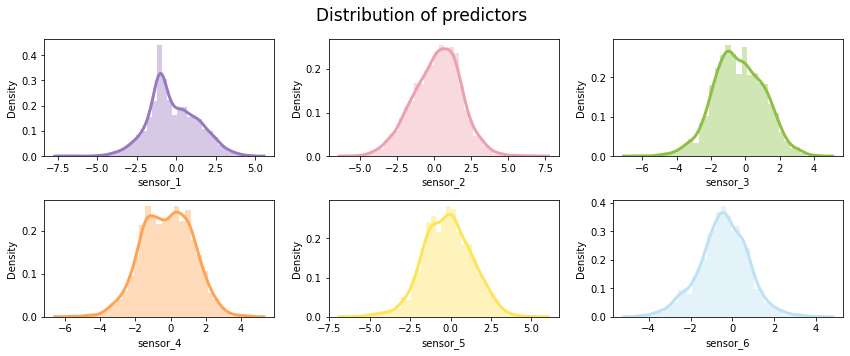

In [31]:
# we will plot the distribution of all the predictors: 
features = ['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6']
colors =["#9979c1", "#eba2ae", "#8dc146", '#ffa455', '#ffe358', '#bde2f2']


f, axes = plt.subplots(2,3, figsize = (12, 5))
f.suptitle('Distribution of predictors', fontsize = 17 )

for i, ax in enumerate(axes.flatten()): 
    sns.distplot(data[features].iloc[: , i], color = colors[i], ax = ax, kde_kws=dict(linewidth=3))
plt.tight_layout(); 

We can see the distribution for each sensor, some of them seem close to a normal distribution, we can check if they follow a normal distribution using the Shapiro-Wilk Normality Test. Our Hypothesis is:

+ H₀: The data is normally distributed.


+ H₁: The data is not normally distributed.

We will create a function that checks the distribution for each target: 

In [32]:
# import library for test
from scipy.stats import shapiro

# create a function that checks if the distribution is normal: 
def check_normal_distribution(data): 
    
    for i in data[features]: 
        stat, p_value_norm = shapiro(data[i])
        print(f'Results for {i}:')
        print('stat=%.3f, p=%.3f' % (stat, p_value_norm))
    
        if p_value_norm < 0.05 : 
            print("Reject null hypothesis at 95% Significance Level  >> The data is not normally distributed")
            print('----------------------------------------------------------------------------------------------')
        else: 
            print("Fail to reject null hypothesis at 95€ Significance Level  >> The data is normally distributed")
            print('----------------------------------------------------------------------------------------------')

In [33]:
check_normal_distribution(data[features])

Results for sensor_1:
stat=0.989, p=0.000
Reject null hypothesis at 95% Significance Level  >> The data is not normally distributed
----------------------------------------------------------------------------------------------
Results for sensor_2:
stat=0.996, p=0.000
Reject null hypothesis at 95% Significance Level  >> The data is not normally distributed
----------------------------------------------------------------------------------------------
Results for sensor_3:
stat=0.998, p=0.005
Reject null hypothesis at 95% Significance Level  >> The data is not normally distributed
----------------------------------------------------------------------------------------------
Results for sensor_4:
stat=0.997, p=0.000
Reject null hypothesis at 95% Significance Level  >> The data is not normally distributed
----------------------------------------------------------------------------------------------
Results for sensor_5:
stat=0.998, p=0.004
Reject null hypothesis at 95% Significance Level  

After performing the test we found that none of the variables follows a normal distribution. To see other characteristics of the variables that we may have missed, we can also make a boxplot graph, in this case we will separate the boxplots for each target. 

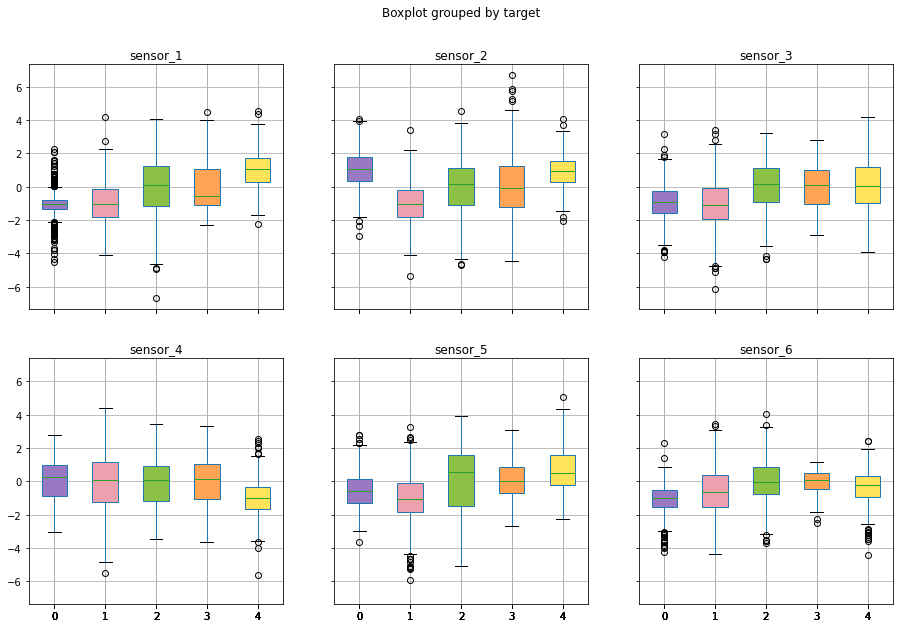

In [34]:
bp_dict = data.boxplot(
by="target",layout=(2,3),figsize=(15,10), 
return_type='both',
patch_artist = True,
)
colors =["#9979c1", "#eba2ae", "#8dc146", '#ffa455', '#ffe358']

for row_key, (ax,row) in bp_dict.iteritems():
    ax.set_xlabel('')
    
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(colors[i])
        
plt.show()

Looking at the graph we see that target 0 (stable) seems to have many outliers, especially in sensors 1, 3 and 5. 

+ **Evaluation of correlation among features**

We can check correlation betwween the features and with our target: 

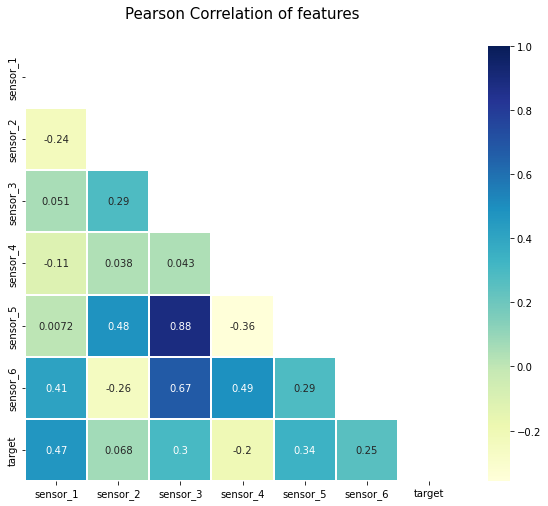

In [35]:
# corr matrix 
plt.figure(figsize=(10,8))
colormap = plt.cm.YlGnBu

matrix = np.triu(data.astype(float).corr())
plt.title('Pearson Correlation of features', y=1.05, size = 15)
sns.heatmap(data.astype(float).corr(), linewidths=0.1,vmax=1.0, square = True, cmap = colormap, 
           linecolor = 'white', annot = True, mask = matrix)
plt.show()

Some features seem to be highly correlated with each other: 

+ sensor_3 is highly correlated with sensor_5 and sensor_6. 
+ sensor_4 has a medium correlation with sensor_6. 
+ target is also somewhat correlated with some of the sensors, specially sensor_1. 

We can draw some scatterplots between the different features to have a better view, we will colour this by target to evaluate if we see a significant relationship: 

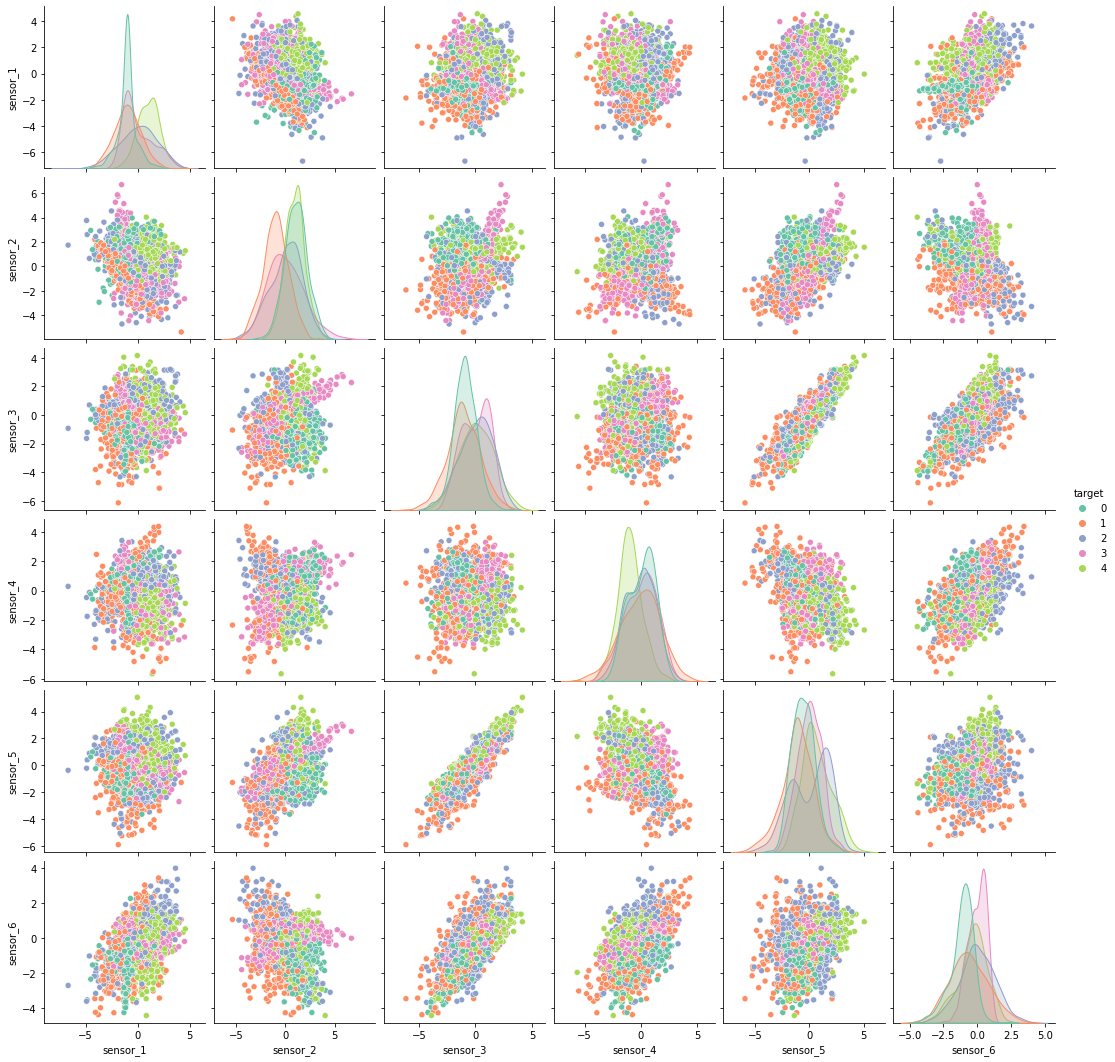

In [36]:
sns.pairplot(data , hue='target', palette = 'Set2');

#### Some notes on multicolinearity: 

+ We observe a high correlation between some of the features as we saw in the heatmap. Some variables are highly correlated although we do not observe a clear pattern with respect to the different targets in the scatterplots. 

+ This high correlation of predictors makes sense in our model, since we are dealing with data collected by different sensors measuring turbulence, so it is logical that the results from various sensors are correlated with each other. 

+ Although we could perform an analysis to eliminate the high multicollinearity, being a model with so few variables we could lose predictive power, so the most appropriate would be to evaluate the Test set to see how the variables are related for these data. If the variables have the same correlation as in our Train data, then multicollinearity does not necessarily has to affect our results in a negative way. 

In [37]:
# opening the test dataset 

test_data = pd.read_csv('space_X_test.csv')
test_data.head()

,Unnamed: 0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6
0,0,0.943723,-2.985473,-0.938218,3.580261,-3.038106,2.080338
1,1,-0.899819,1.295568,1.274513,0.718186,1.117035,0.463068
2,2,0.293281,-0.099317,1.874902,-0.589582,1.828441,1.011596
3,3,-1.134804,0.888585,-1.464499,-1.183056,-0.525729,-1.963822
4,4,-0.909240,1.575797,0.697212,1.197092,0.486185,0.222644


In [38]:
# drop first column Unnamed 
test_data.drop("Unnamed: 0",axis=1, inplace = True)

In [39]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sensor_1  900 non-null    float64
 1   sensor_2  900 non-null    float64
 2   sensor_3  900 non-null    float64
 3   sensor_4  900 non-null    float64
 4   sensor_5  900 non-null    float64
 5   sensor_6  900 non-null    float64
dtypes: float64(6)
memory usage: 42.3 KB


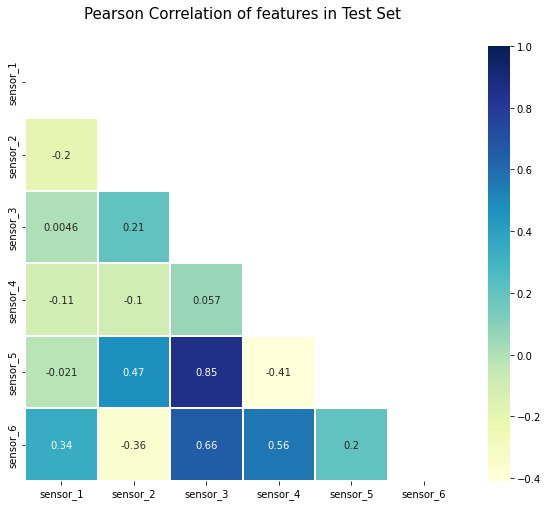

In [40]:
# corr matrix for test set 
plt.figure(figsize=(10,8))
colormap = plt.cm.YlGnBu

matrix = np.triu(test_data.astype(float).corr())
plt.title('Pearson Correlation of features in Test Set', y=1.05, size = 15)
sns.heatmap(test_data.astype(float).corr(), linewidths=0.1,vmax=1.0, square = True, cmap = colormap, 
           linecolor = 'white', annot = True, mask = matrix)
plt.show()

We found that although some correlation values may vary ,features are also highly correlated in Test set. 

+ **Evaluating the target**

Now let's check the distribution of the target: 

In [45]:
data.target.value_counts()

0    427
3    426
1    423
2    419
4    405
Name: target, dtype: int64

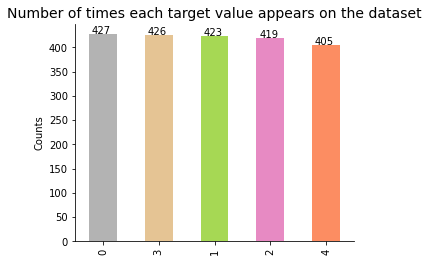

In [7]:
# countplot of targets 

cmap = plt.get_cmap('Set2')
clrs = cmap(np.linspace(1, 0, 6)) 
ax = data.target.value_counts().plot(kind= 'bar', figsize = (5,4), 
                            color = clrs)
ax.set_title('Number of times each target value appears on the dataset', fontsize = 14)
ax.set_ylabel('Counts', fontsize = 10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for i in ax.patches: 
    ax.text(i.get_x()+0.05, i.get_height() + 0.95, str(round(i.get_height(), 2 )), fontsize = 10); 

We find that the target column contains values that are very balanced, so we do not need to take any action. 

### Model Building

+ **Model selection with Pycaret**

We will use the library Pycaret to make a comparison across different models and choose the one that gives a better performance. As we have already checked our predictors do not follow a normal distribution, so we will introduce the parameter 'normalize = True' in our function to make the comparison with the scaled values. 

In [7]:
from pycaret.classification import * 

# use normalize=True to evaluate model selection with normalized data
clf = setup(data, target='target', session_id=42, normalize = True)

,Description,Value
0,session_id,42
1,Target,target
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(2100, 7)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
# print the result for best models 
best= compare_models()
best

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7665,0.9467,0.7662,0.7710,0.7656,0.7081,0.7095,0.0850
et,Extra Trees Classifier,0.7651,0.9440,0.7642,0.7697,0.7645,0.7062,0.7076,0.0720
lightgbm,Light Gradient Boosting Machine,0.7597,0.9424,0.7595,0.7655,0.7586,0.6996,0.7015,0.1350
knn,K Neighbors Classifier,0.7508,0.9264,0.7494,0.7556,0.7488,0.6881,0.6900,0.0090
gbc,Gradient Boosting Classifier,0.7406,0.9369,0.7401,0.7447,0.7387,0.6756,0.6773,0.3600
dt,Decision Tree Classifier,0.6746,0.7968,0.6739,0.6821,0.6750,0.5932,0.5947,0.0060
qda,Quadratic Discriminant Analysis,0.6032,0.8785,0.5979,0.6421,0.5951,0.5022,0.5122,0.0090
nb,Naive Bayes,0.5650,0.8423,0.5610,0.5641,0.5476,0.4549,0.4612,0.0050
ada,Ada Boost Classifier,0.5630,0.8057,0.5629,0.5581,0.5485,0.4531,0.4579,0.0430
lr,Logistic Regression,0.5262,0.7977,0.5288,0.5063,0.5061,0.4080,0.4121,0.6210


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

It seems that Random Forest Classifier is the model that gives us the best results so we are going to use it for our predictions. 

+ **Split the data and create Random Forest model with Sklearn**

In [4]:
# import library 
from sklearn.model_selection import train_test_split

# define target
y = data['target']
# define predictors 
X = data.drop(['target'], axis = 1)

In [5]:
print('data.shape: ', data.shape)
print('y.shape: ', y.shape)
print('X.shape', X.shape)

data.shape:  (2100, 7)
y.shape:  (2100,)
X.shape (2100, 6)


In [6]:
# choose test size of 20% 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [7]:
print('X_train.shape: ', X_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (1680, 6)
X_test.shape:  (420, 6)
y_train.shape:  (1680,)
y_test.shape:  (420,)


+ **Scaling the data**

RandomForest does not require that the variables follow a normal distribution but as we have observed that the features contain some outliers, we can use RobustScaler to make our model more consistent.  

In [8]:
from sklearn.preprocessing import RobustScaler

robust = RobustScaler()

# fit_transform on train data 
X_train = robust.fit_transform(X_train)

# transform on test data 
X_test = robust.transform(X_test)

+ **Preparing Base Model - Random Forest Classifier**

In [9]:
# import library for model 
from sklearn.ensemble import RandomForestClassifier

# instantiate the model 
rf = RandomForestClassifier(random_state= 42)

# fit in train data 
rf.fit(X_train, y_train)

# predictions on test set with our trained model 
rf_predictions = rf.predict(X_test)

We can now calculate F1 macro score and confusion matrix: 

In [11]:
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

print('Random Forest f1 score on test: {:.4f}'.format(f1_score(y_test, rf_predictions, average= 'macro')))

Random Forest f1 score on test: 0.7836


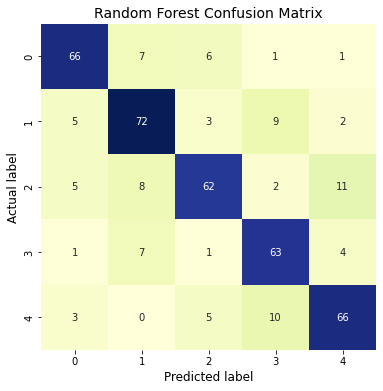

In [104]:
# confusion matrix 
rf_cm = confusion_matrix(y_test, rf_predictions)

labels = [0, 1, 2, 3, 4]
plt.figure(figsize= (6,6))
sns.heatmap(pd.DataFrame(rf_cm), annot = True, fmt='g', cbar = False, cmap="YlGnBu", xticklabels= labels, 
            yticklabels= labels)
plt.title('Random Forest Confusion Matrix', fontsize = 14)
plt.ylabel('Actual label',fontsize = 12 )
plt.xlabel('Predicted label', fontsize = 12);

In [12]:
y_test.value_counts().sort_index()

0    81
1    91
2    88
3    76
4    84
Name: target, dtype: int64

**Interpretation of confusion matrix**

+ If we look at class 0, in our test set, there are 81 observations than measure target 0 ('Estable). 66 of these observations have been predicted correctly and 15 of them got ptedictions wrong. 
+ In wrong predictions for class 0, we have wrongly identified 7 observations as class 1, 6 as class 2, 1 as class 3 and 1 of class 4. 
+ It seems class 2 ('Moderada') is the one with worst predicitions (only 62 correct out of 88). 


Classification report gives us individal metrics for each class: 

In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82        81
           1       0.77      0.79      0.78        91
           2       0.81      0.70      0.75        88
           3       0.74      0.83      0.78        76
           4       0.79      0.79      0.79        84

    accuracy                           0.78       420
   macro avg       0.78      0.79      0.78       420
weighted avg       0.79      0.78      0.78       420



+ **Cross Validation of our initial model**

In [14]:
# we´ll create a function to evaluate a model using Cross Validation 
# import needed libraries 
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

def model_evaluation(model, X, y): 
    # define cross validation prodedure 
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)
    scores = cross_val_score(model, X, y, scoring= 'f1_macro', cv = cv)
    
    return mean(scores), std(scores)

In [15]:
result1 = model_evaluation(rf, X, y)

print('Model Performance: ')
print('f1-score mean (std): %.4f (%.4f)' % (result1[0], result1[1]))


Model Performance: 
f1-score mean (std): 0.7767 (0.0292)


So our result in Cross Validation is 0.7767 with a standard deviation of 0.0292. Seems our model is not overfitting and shows stable results (standard deviation of scores is low). We can save these results in a dataframe. 

In [16]:
results_df = pd.DataFrame(data = [['Base Model', result1[0], result1[1]]], 
                         columns = ['Model', 'CV_f1_macro', 'CV_std'])
results_df

,Model,CV_f1_macro,CV_std
0,Base Model,0.776704,0.029152


+ **Hyperparameter Tuning**

We´ll try to improve our model using **RandomSearch**. First let´s look at the default parameters of our model: 

In [17]:
print ('Parameters of original model: ', rf.get_params(), ' \n')

Parameters of original model:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}  



Among all the parameters, we will select the most important ones to optimize: 

In [39]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = np.linspace(50, 2000, 15, dtype=int)

# Number of features to consider at every split
max_features = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

max_depth = [10, 20, 30, 40, 50, 60]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features, 
               'max_depth': max_depth}

# define classifier 
rf_base_model = RandomForestClassifier()

# define random search 
rf_random = RandomizedSearchCV(estimator = rf_base_model,
                               param_distributions = random_grid,
                               n_iter = 30, cv = 5,
                               random_state=42, scoring='f1_macro')
# fit in our train data
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60],
                                        'max_features': [0.2, 0.3, 0.4, 0.5,
                                                         0.6, 0.7],
                                        'n_estimators': array([  50,  189,  328,  467,  607,  746,  885, 1025, 1164, 1303, 1442,
       1582, 1721, 1860, 2000])},
                   random_state=42, scoring='f1_macro')

In [40]:
print ('Best Parameters: ', rf_random.best_params_, ' \n')

print ('Best f1 score: ', rf_random.best_score_, ' \n')

Best Parameters:  {'n_estimators': 746, 'max_features': 0.5, 'max_depth': 50}  

Best f1 score:  0.769627571525036  



In [41]:
# evaluating results of best parameters with Cross Validation: 
rf_random = RandomForestClassifier(n_estimators = 746, max_features= 0.5 , max_depth=50,  random_state=42)
result2 = model_evaluation(rf_random, X, y)
result2

(0.7781420461095775, 0.028322253454202827)

In [42]:
# store results 
results_df2 = pd.DataFrame(data = [['Random Search', result2[0], result2[1]]], 
                           )

results_df = pd.concat([results_df, results_df2])
results_df

,Model,CV_f1_macro,CV_std
0,Base Model,0.776704,0.029152
0,Random Search,0.778142,0.028322


+ **Refining results with gridsearch**

In [44]:
from sklearn.model_selection import GridSearchCV

# choosing parameters
param_grid = {
    'n_estimators': np.linspace(700, 800, 20, dtype=int), 
    'max_depth': [40,50, 60],
    'max_features' : [0.4, 0.5, 0.6], 
    'criterion': ['gini', 'entropy']
    
}

# define base model 
rf_grid =  RandomForestClassifier(random_state= 42)

# instantiate grid search 
grid_rf_search = GridSearchCV(estimator = rf_grid, param_grid = param_grid, 
                          scoring = 'f1_macro')

# fit data 
grid_rf_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [40, 50, 60],
                         'max_features': [0.4, 0.5, 0.6],
                         'n_estimators': array([700, 705, 710, 715, 721, 726, 731, 736, 742, 747, 752, 757, 763,
       768, 773, 778, 784, 789, 794, 800])},
             scoring='f1_macro')

In [45]:
print ('Best Grid Parameters: ', grid_rf_search.best_params_, ' \n')

print ('Best Grid f1 score: ', grid_rf_search.best_score_, ' \n')

Best Grid Parameters:  {'criterion': 'gini', 'max_depth': 40, 'max_features': 0.5, 'n_estimators': 789}  

Best Grid f1 score:  0.7693951030533726  



In [46]:
# evaluating results of best parameters with Cross Validation: 
rf_grid = RandomForestClassifier(n_estimators = 789, max_features= 0.5 , max_depth=40, criterion = 'gini' ,
                                 random_state=42)
result3 = model_evaluation(rf_grid, X, y)
result3

(0.7783005671440479, 0.028368210242153007)

In [48]:
# store results 
results_df3 = pd.DataFrame(data = [['Grid Search', result3[0], result3[1]]], 
                          columns = ['Model', 'CV_f1_macro', 'CV_std'])
results_df = pd.concat([results_df, results_df3])
results_df

,Model,CV_f1_macro,CV_std
0,Base Model,0.776704,0.029152
0,Random Search,0.778142,0.028322
0,Grid Search,0.778301,0.028368


+ **Maximize optimal number of trees**

We see very little improvement with Grid Search results. Sometimes searching for the best combination of parameters can take a lot of computational time, but we can also use the parameters returned by GridSearch and look for the optimal number of estimators (number of trees) graphically on a wider range: 

In [58]:
# with these parameters, we can search for optimal number of estimators
f1_scores =[]
for k in range(10, 1200, 5):
    rfc = RandomForestClassifier(n_estimators=k, max_depth=40, max_features= 0.5, criterion= 'gini' , random_state=42)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred, average = 'macro'))

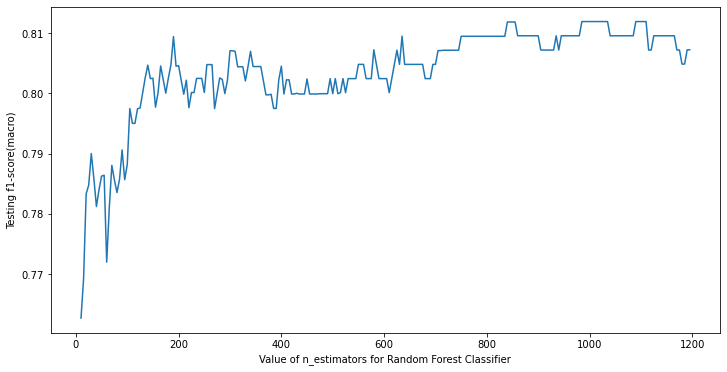

In [60]:
# plot the relationship between K and testing f1-score
# plt.plot(x_axis, y_axis)
plt.figure(figsize=(12, 6))
plt.plot(range(10, 1200, 5), f1_scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing f1-score(macro)'); 

In [61]:
print(max(f1_scores))

0.8119331526270676


In [62]:
# find optimal number of estimators 
max_index = (f1_scores.index(max(f1_scores)) * 5) + 10

print('Optimal number of estimators is', max_index)

Optimal number of estimators is 985


We have found that the optimal value of trees is **985**, which is a quite high value considering our dataset, but we see that there are other points that may have similar f1_scores, let´s look for some other values: 

In [76]:
# looking for the top 5 values 
high_scores = sorted(set(f1_scores))[-6:-1]
print(high_scores)

[0.8094462557753662, 0.8094887767129789, 0.809514764696187, 0.809574533238294, 0.8118615679547977]


The top 5 values are very similar, let´s look for the lowest number of k (number of estimators) in this top 5: 

In [98]:
# we look for the lowest k that has a hight f1_score 
for k in range(-1, -6, -1): 
    max_index2 = (f1_scores.index(sorted(set(f1_scores))[k]) * 5) + 10
    print(max_index2)

985
840
860
635
750


We observe **635 estimators** gives us a good result and it is much more efficient than 985. Let´s use it to construct the model: 

In [101]:
rf_max = RandomForestClassifier(n_estimators= 635, max_depth=40, max_features= 0.5, criterion = 'gini' ,random_state=42)

rf_max.fit(X_train, y_train)
y_pred_max = rf_max.predict(X_test)

print('Random Forest f1 score on test: {:.4f}'.format(f1_score(y_test, y_pred_max, average= 'macro')))

Random Forest f1 score on test: 0.8095


In [102]:
result4 = model_evaluation(rf_max, X, y)
result4

(0.7784528291139078, 0.028651432099333154)

In [103]:
results_df4 = pd.DataFrame(data = [['Model Optimal Trees', result4[0], result4[1]]], 
                          columns = ['Model', 'CV_f1_macro', 'CV_std'])

results_df = pd.concat([results_df, results_df4])
results_df

,Model,CV_f1_macro,CV_std
0,Base Model,0.776704,0.029152
0,Random Search,0.778142,0.028322
0,Grid Search,0.778301,0.028368
0,Model Optimal Trees,0.778453,0.028651


Although the result is similar to the previous ones, we have achieved a small improvement while reducing the number of trees. 

+ **Visualizing our final model**

Let´s do the confusion matrix again with our final model: 

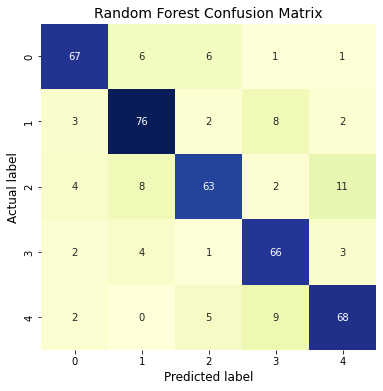

In [106]:
# confusion matrix 
rf_max_cm = confusion_matrix(y_test, y_pred_max)

labels = [0, 1, 2, 3, 4]
plt.figure(figsize= (6,6))
sns.heatmap(pd.DataFrame(rf_max_cm), annot = True, fmt='g', cbar = False, cmap="YlGnBu", xticklabels= labels, 
            yticklabels= labels)
plt.title('Random Forest Confusion Matrix', fontsize = 14)
plt.ylabel('Actual label',fontsize = 12 )
plt.xlabel('Predicted label', fontsize = 12);

We notice that all classes have improved with respect to the initial model!! Let's see the classification report: 

In [107]:
print(classification_report(y_test, y_pred_max))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        81
           1       0.81      0.84      0.82        91
           2       0.82      0.72      0.76        88
           3       0.77      0.87      0.81        76
           4       0.80      0.81      0.80        84

    accuracy                           0.81       420
   macro avg       0.81      0.81      0.81       420
weighted avg       0.81      0.81      0.81       420



+ **ROC/AUC Curve**

Although the ROC/AUc curve is used for binary classification models, it can also be represented using the **one-versus-all** technique. This means that for example, the ROC for class 0 is generated by representing the classifier as 0 versus not 0, and so on for all classes in succession. 

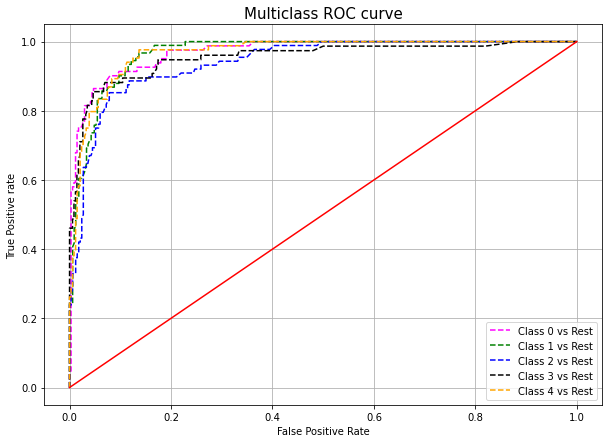

In [109]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

rf_max_predict_proba = rf_max.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

# defining number of classes 
n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, rf_max_predict_proba[:,i], pos_label=i)
    
# plotting    
plt.figure(figsize = (10,7))
plt.plot(fpr[0], tpr[0], linestyle='--',color='magenta', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='black', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='orange', label='Class 4 vs Rest')
plt.plot([0, 1], [0, 1], color = 'red')
plt.title('Multiclass ROC curve', fontsize = 15)
plt.grid(True)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()    

Although it is clear from the plot that Class 2 is the one with the worst predictions, we can see that our model is quite balanced between all classes. 

### Using all data to prepare the model for final predictions

+ **Define a Pipeline to prepare our final model**

Now that we have determined the parameters we are going to use, we will train our model with all the data we have available to generate the predictions. 

We will use a pipeline this time to apply the scaling (using Robust Scaler as before). 

In [10]:
print('y.shape: ', y.shape)
print('X.shape', X.shape)

y.shape:  (2100,)
X.shape (2100, 6)


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

transformer = RobustScaler()

# prepare the scaler 
preprocessor = ColumnTransformer(
               transformers = [
                   ('scaling', transformer, X.columns)
               ])

# prepare the model 
final_model = RandomForestClassifier(n_estimators= 635, max_depth=40, max_features= 0.5, criterion = 'gini' 
                                     ,random_state=42)

# prepare Pipeline 
pipeline = Pipeline( steps= [
    ('preprocessor', preprocessor), 
    ('model', final_model)
])

# fit on all data 
pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaling', RobustScaler(),
                                                  Index(['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6'], dtype='object'))])),
                ('model',
                 RandomForestClassifier(max_depth=40, max_features=0.5,
                                        n_estimators=635, random_state=42))])

+ **Apply model to make predictions on test data and save results**

In [12]:
# open test data 
test_data = pd.read_csv('space_X_test.csv')
# drop first column Unnamed 
test_data.drop("Unnamed: 0",axis=1, inplace = True)
test_data.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6
0,0.943723,-2.985473,-0.938218,3.580261,-3.038106,2.080338
1,-0.899819,1.295568,1.274513,0.718186,1.117035,0.463068
2,0.293281,-0.099317,1.874902,-0.589582,1.828441,1.011596
3,-1.134804,0.888585,-1.464499,-1.183056,-0.525729,-1.963822
4,-0.909240,1.575797,0.697212,1.197092,0.486185,0.222644


In [13]:
test_data.shape

(900, 6)

In [14]:
final_predictions = pipeline.predict(test_data)
final_predictions

array([1, 3, 2, 0, 3, 2, 4, 0, 2, 3, 1, 4, 1, 1, 4, 4, 4, 3, 2, 0, 1, 2,
       3, 0, 0, 3, 0, 2, 2, 4, 2, 2, 4, 3, 3, 1, 0, 4, 3, 0, 4, 2, 3, 2,
       2, 0, 0, 1, 2, 4, 4, 0, 2, 0, 4, 4, 1, 3, 3, 0, 3, 0, 3, 0, 4, 1,
       1, 0, 2, 3, 0, 1, 4, 0, 4, 0, 0, 1, 0, 3, 4, 3, 1, 3, 1, 1, 2, 3,
       1, 2, 2, 4, 1, 1, 0, 1, 4, 2, 0, 4, 0, 0, 0, 4, 2, 4, 4, 4, 1, 2,
       4, 1, 3, 3, 3, 0, 1, 4, 2, 2, 0, 4, 4, 3, 3, 2, 4, 1, 3, 2, 2, 1,
       4, 0, 0, 2, 3, 0, 0, 4, 0, 4, 3, 2, 1, 3, 4, 3, 4, 4, 3, 2, 1, 2,
       0, 4, 2, 4, 4, 2, 0, 2, 3, 1, 1, 4, 1, 3, 2, 0, 1, 2, 4, 4, 1, 2,
       3, 0, 3, 4, 2, 1, 0, 2, 2, 2, 0, 3, 4, 1, 1, 1, 2, 4, 0, 0, 4, 4,
       1, 2, 0, 2, 4, 3, 2, 2, 3, 1, 1, 3, 0, 0, 2, 1, 1, 3, 4, 2, 2, 1,
       2, 2, 2, 0, 3, 2, 0, 2, 2, 3, 0, 2, 4, 3, 2, 4, 0, 3, 3, 3, 1, 4,
       3, 0, 2, 0, 2, 1, 2, 0, 2, 3, 1, 3, 1, 1, 0, 3, 2, 4, 2, 1, 0, 2,
       2, 4, 2, 4, 1, 2, 1, 4, 2, 0, 3, 0, 1, 4, 2, 4, 1, 1, 2, 1, 1, 4,
       0, 0, 2, 2, 3, 1, 0, 2, 0, 0, 4, 4, 1, 3, 0,

In [16]:
# save results 
final_predictions_df = pd.DataFrame({'final_status': final_predictions})
final_predictions_df.head()

,final_status
0,1
1,3
2,2
3,0
4,3


In [17]:
# save to csv file 
final_predictions_df.to_csv('predictions.csv', index = False )

### Conclusions 

+ We have chosen RandomForest for our predictions because of its good results compared to the other models evaluated. 

+ We have found that RandomForest has been a very stable model and when performing CrossValidation it has given us very consistent results, so we believe that it is a robust model. 

+ On the other hand,  it has been difficult to improve the initial results of the model, we tried several different techniques (RandomSearch, GridSearch and tree maximization) and we have achieved small improvements. It seems that the  default parameters already worked well with our data. 